## HSI Tutorial (Part 2: Running coupled HSI-LLM model)

Elchin Jafarov 
8/2018
modified 
6/2019

## 2.Running coupled HSI-LLM model
The original version of the LLM model is using 25x25 grid cell resolution, where each cell is 5m (i.e. can be subseted  to only equal number of sets of 5 gridcells). In the example below, we demonstrate the application of the LLM model and plot HVI metric. 

In [1]:
import numpy as np
import hsiscore_class as HSI
import LLM_model_class as llm
#import LLM_model_cpy as llm

import matplotlib.pyplot as plt
import hsi_plot_utils as hsi_plt
%matplotlib inline
import time
hsi=HSI.hsi_score()

In [2]:
p = llm.LLM()     # assign p to the llm class
p.instantiate(0)  # 1: reads input data from file, 0: generate inputs internally
p.verbose=0
p.run(200)
p.save_pickle()

p.instantiate(1)  # 1: reads input data from file, 0: generate inputs internally
p.verbose=0       # 0: do not print out scores, 1: print scores on the screen
p.fire_prob = 0.0 # yearly fire probability, Ich: 0.35, Ord: 0.25
p.mast_prob = 0.15 # seed masting prob. for LP, based on Boyer's long-term data
p.readfireprobfromfile=0
p.readmastprobfromfile=0
start_time = time.time()
p.run(200)
print("--- %s minutes ---" % str(float((time.time() - start_time))/60) )

no. of starting HW trees 63
Read from fire file .....
Read from must file .....
no. of starting HW trees 41
--- 1.66902170181 minutes ---


NOTE: fire probab = 0 leads to few llp and a lof of HW trees (see figures below). Therefore bad scores for all species. 

###  LLP: height, age, and count 

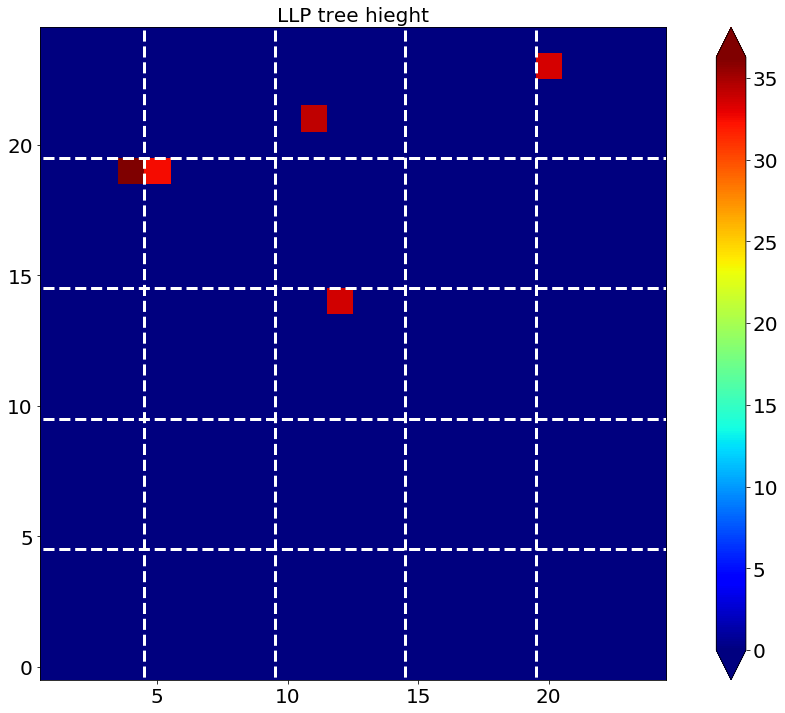

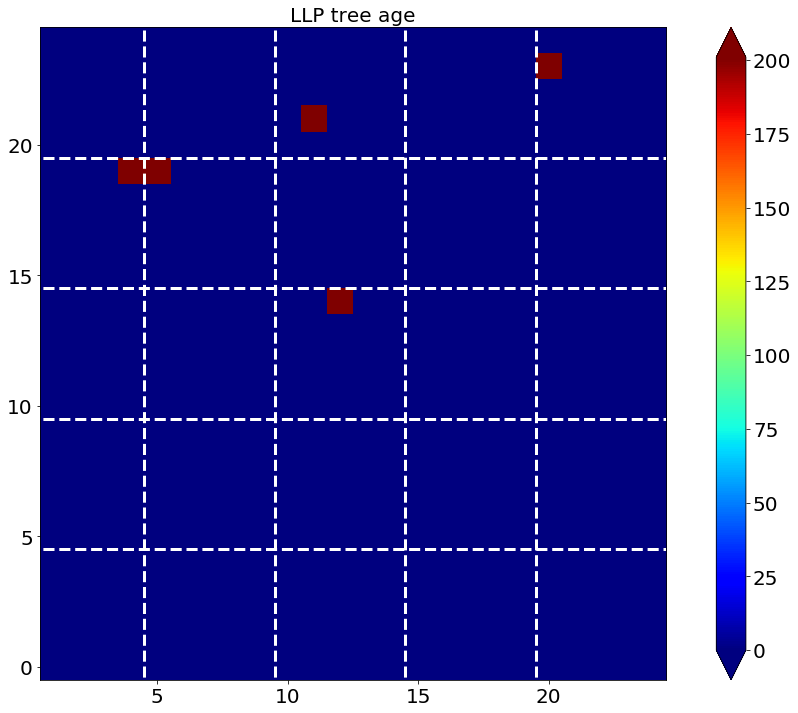

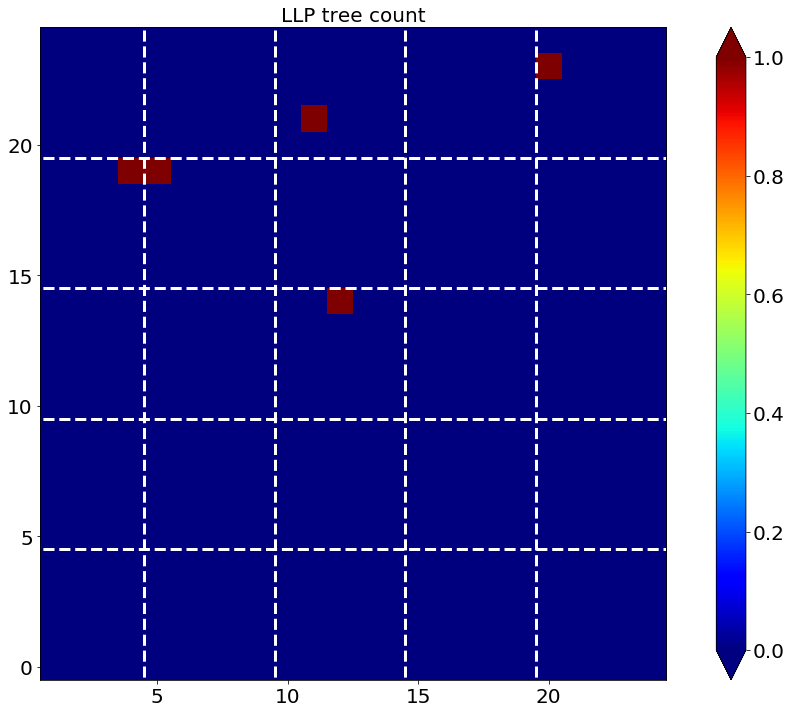

In [3]:
axx=hsi_plt.plot_area_matrix(p.old_ht,'LLP tree hieght') 
hsi_plt.gridon(axx)
axx=hsi_plt.plot_area_matrix(p.old_age,'LLP tree age') 
hsi_plt.gridon(axx)
#plt.savefig('figure5',  bbox_inches="tight")
axx=hsi_plt.plot_area_matrix(p.old_LPcount,'LLP tree count')
hsi_plt.gridon(axx)

###  HW: height, age, and count 

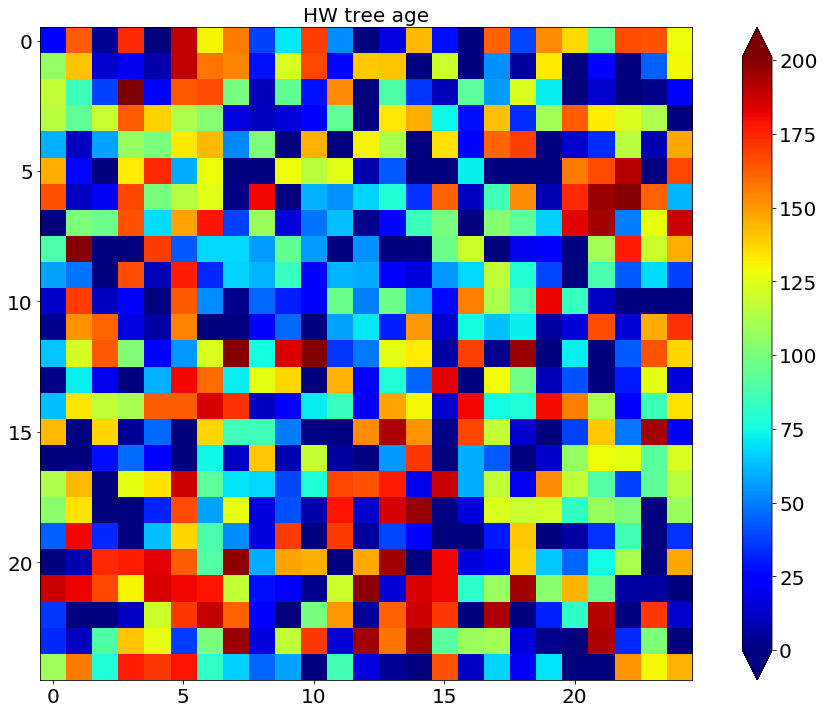

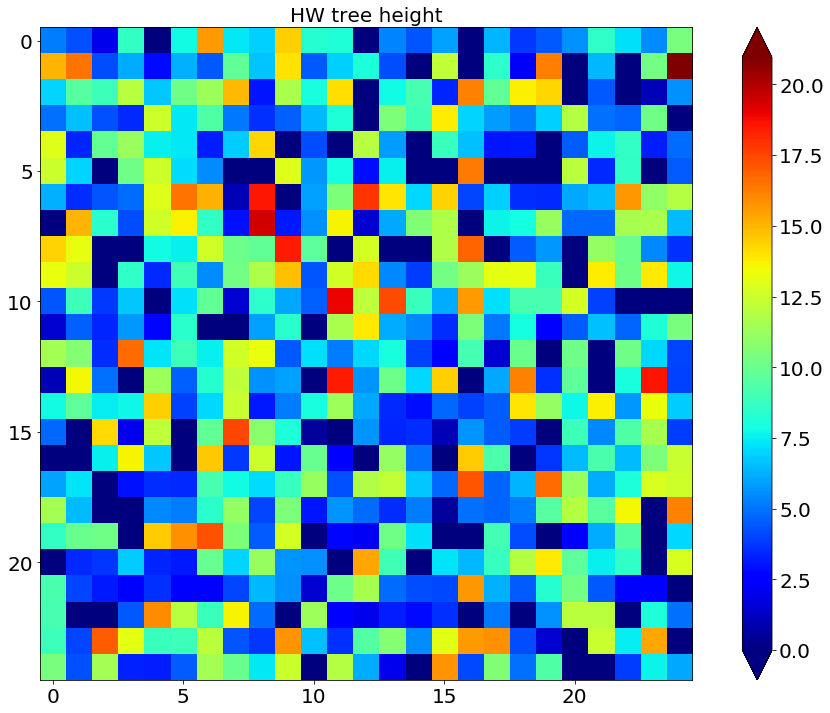

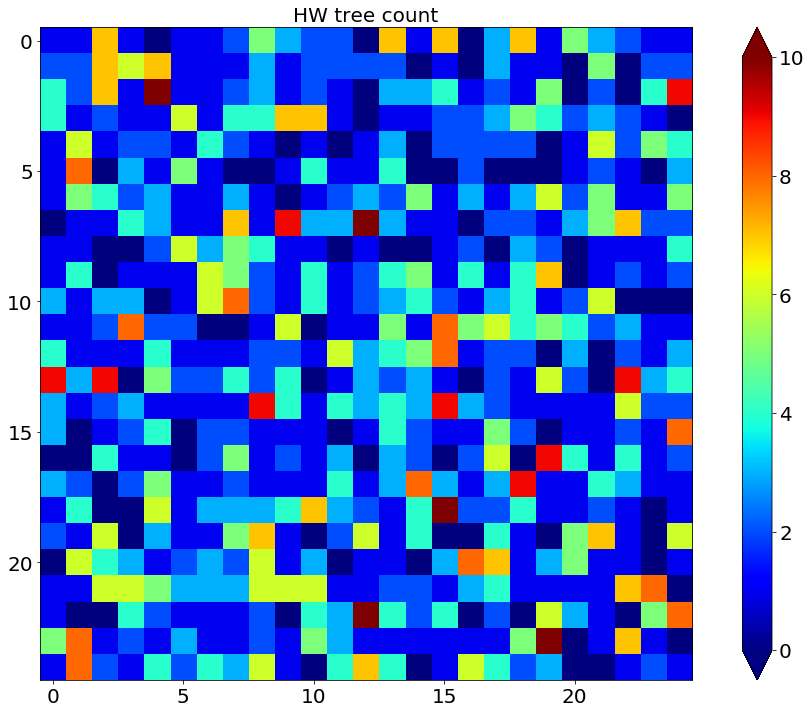

In [4]:
hsi.nsize = 25
hsi.msize = 25
sub_hw_age=hsi.subset_matrix(p.old_ageHW, 0, 0)
hsi_plt.plot_area_matrix(sub_hw_age,'HW tree age');

sub_hw_height=hsi.subset_matrix(p.old_htHW, 0, 0)
hsi_plt.plot_area_matrix(sub_hw_height,'HW tree height');

sub_hw_count=hsi.subset_matrix(p.old_HWcount, 0, 0)
hsi_plt.plot_area_matrix(sub_hw_count,'HW tree count');

## Testing out different tree_mature_age constrains (matter only for SFS)

Now for given fire and mast probabilities plot the RCW scores, tree counts, and species scores.

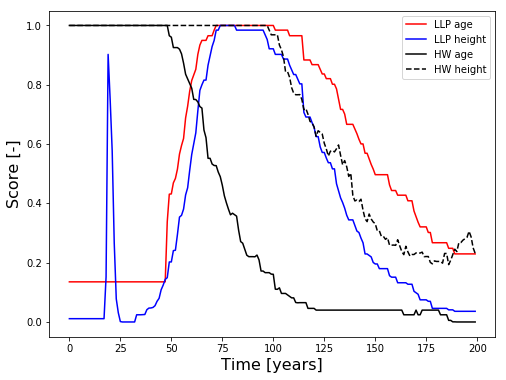

In [7]:
hsi_plt.plot_rcw_scores(p)

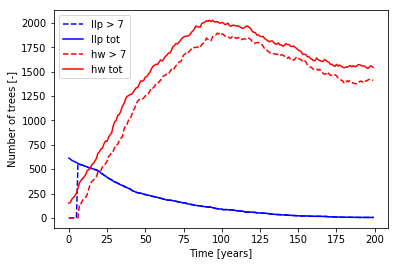

In [8]:
hsi_plt.plot_tree_count(p)

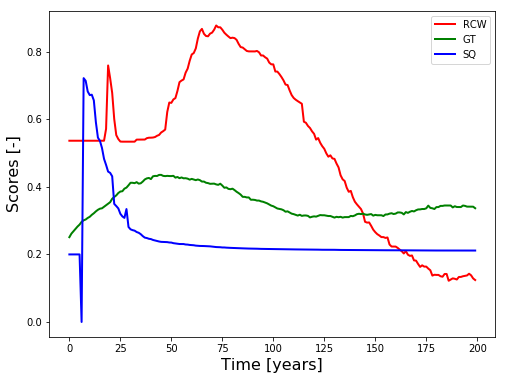

In [9]:
hsi_plt.plot_species_scores(p)

In [10]:
p.instantiate(1)   # reinitialize all parameters
# Maturity age of the HW tree, for high fire prob it gets killed to often so start with small age
p.tree_mature_age=30
p.run(200) 

no. of starting HW trees 67


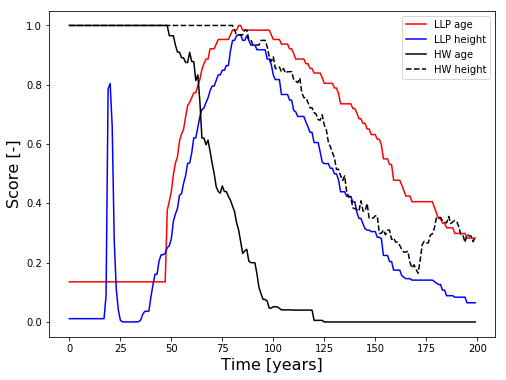

In [11]:
hsi_plt.plot_rcw_scores(p)

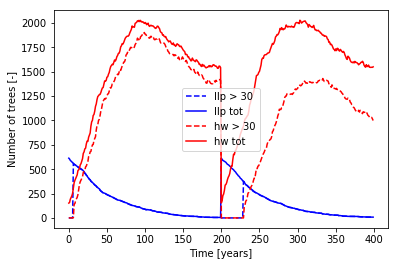

In [12]:
hsi_plt.plot_tree_count(p)

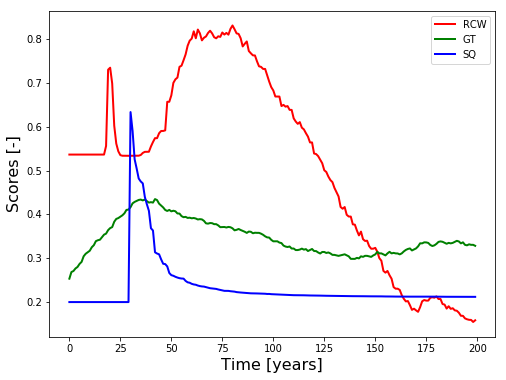

In [13]:
hsi_plt.plot_species_scores(p)

**'count_events'** can be used to print out fire or mast events occurances 